In [1]:
pip install plotly_express==0.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install downcast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install calmap==0.0.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from downcast import reduce
import calmap
import warnings
from plotly.io import to_image
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
# sales = pd.read_pickle('sales_ad.pkl')
# cal = pd.read_pickle('cal_ad.pkl')
# prices = pd.read_pickle('prices_ad.pkl')

In [6]:
# Data overvies
# There are 3 data training files as follows:

sales = pd.read_csv("sales_train_validation.csv")
prices = pd.read_csv("sell_prices.csv")
cal = pd.read_csv("calendar.csv")

print("Shape of sales", sales.shape)
print("Shape of prices", prices.shape)
print("Shape of cal", cal.shape)

Shape of sales (30490, 1919)
Shape of prices (6841121, 4)
Shape of cal (1969, 14)


In [7]:
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [8]:
prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [9]:
cal.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [10]:
#Basic info about data

print('No of unique items in a store', len(sales['item_id'].unique()))
print('No of Departments', len(sales['dept_id'].unique()))
print('No of Categories', len(sales['cat_id'].unique()))
print('Total Stores', len(sales['store_id'].unique()))
print('States:', len(sales['state_id'].unique()))

No of unique items in a store 3049
No of Departments 7
No of Categories 3
Total Stores 10
States: 3


In [11]:
# The states are CA, TW and WI
# The store are CA_1, CA_2, CA_3, CA_4(CA), TX_1, TX_2, TX_3(TX) and WI_1, WI_2, WI_3(WI).
# The categories are FOODS, HOUSEHOLD and HOBIES.
# The Departments are FOODS_1, FOODS_2, FOODS_3(FOODS), HOUSEHOLD_1, HOUSEHOLD_2(HOUSEHOLD) AND HOBBIES_1, HOBBIES_2(HOBBIES).

In [12]:
# OVERVIEW of Dataset

In [13]:
# Downcasting

In [14]:
sales_bd = np.round(sales.memory_usage().sum()/(1024*1024),1)
prices_bd = np.round(prices.memory_usage().sum()/(1024*1024),1)
cal_bd = np.round(cal.memory_usage().sum()/(1024*1024),1)


#sales = pd.read_pickle("sales_ad.pkl")
#prices = pde.read_pickle("prices_ad.pkl")
#cal = pd.read_pickle("cal_ad.pkl")

sales_ad = np.round(sales.memory_usage().sum()/(1024*1024),1)
prices_ac = np.round(prices.memory_usage().sum()/(1024*1024),1)
cal_bd = np.round(cal.memory_usage().sum()/(1024*1024),1)

In [15]:
# Getting file size in MB before downcasting
sales_bd = np.round(sales.memory_usage().sum()/(1024*1024),1)
prices_bd = np.round(prices.memory_usage().sum()/(1024*1024),1)
cal_bd = np.round(cal.memory_usage().sum()/(1024*1024),1)

# Downcasting the dataframes
sales = reduce(sales)
prices = reduce(sales)
cal = reduce(cal)

# Getting size after Downcasting
sales_ad = np.round(sales.memory_usage().sum()/(1024*1024),1)
prices_ad = np.round(prices.memory_usage().sum()/(1024*1024),1)
cal_ad = np.round(cal.memory_usage().sum()/(1024*1024),1)

In [16]:
print("The size of sales (in MB) before/after downcasting:", sales_bd,'/',sales_ad)
print("The size of prices (in MB) before/after downcasting", prices_bd,'/', prices_ad)
print("The size of cal (in MB) before/after downcasting",cal_bd,'/',cal_ad)

The size of sales (in MB) before/after downcasting: 446.4 / 95.2
The size of prices (in MB) before/after downcasting 208.8 / 95.2
The size of cal (in MB) before/after downcasting 0.2 / 0.1


In [17]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl (79.9 MB)
  Attempting uninstall: kaleido
    Found existing installation: kaleido 0.1.0
    Uninstalling kaleido-0.1.0:
      Successfully uninstalled kaleido-0.1.0


In [18]:
pip install kaleido==0.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached kaleido-0.1.0-py2.py3-none-manylinux1_x86_64.whl (74.6 MB)
  Attempting uninstall: kaleido
    Found existing installation: kaleido 0.2.1
    Uninstalling kaleido-0.2.1:
      Successfully uninstalled kaleido-0.2.1


In [19]:
import plotly.graph_objects as go
import numpy as np
from pathlib import Path

In [20]:
import plotly
import kaleido

print(plotly.__version__, kaleido.__version__)

5.5.0 0.1.0


In [21]:
dic = {'DataFrame':['sales','prices','cal'],
       'Before downcasting':[sales_bd,prices_bd,cal_bd],
       'After downcasting':[sales_ad,prices_ad,cal_ad]}

memory = pd.DataFrame(dic)
memory = pd.melt(memory, id_vars='DataFrame', var_name='Status', value_name='Memory (MB)')
memory.sort_values('Memory (MB)',inplace=True)
fig = px.bar(memory, x='DataFrame', y='Memory (MB)', color='Status', barmode='group', text='Memory (MB)')
fig.update_traces(texttemplate='%{text} MB', textposition='outside')
fig.update_layout(template='seaborn', title='Effect of Downcasting')
#fig.show()
img_bytes = fig.to_image(format="png")

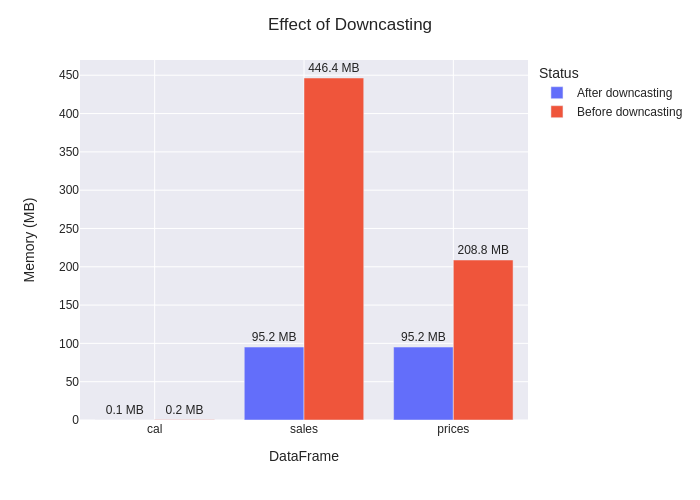

In [22]:
Image(img_bytes)

In [23]:
#Among all three dataframes sales got reduced the most maybe because of the 1913 int columns got reduced to it's lowest datatype

In [24]:
# EDA

In [25]:
# EDA of Sales Data

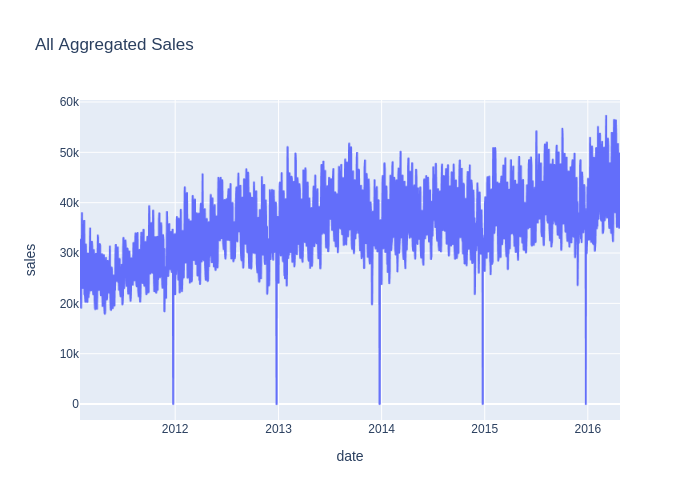

In [26]:
d_cols = [i for i in sales.columns if 'd_' in i]

sales_df = sales[d_cols]

total_sales = list(sales_df.sum(axis=0))

date_list = [d for d in pd.date_range(start = '2011-01-29', end = '2016-04-24')]
agg_sales = pd.DataFrame({'date' : date_list, 'sales' : total_sales})

fig = px.line(agg_sales, x = 'date', y = 'sales', title = 'All Aggregated Sales')

for ser in fig['data']:
   ser['text']=[d.strftime('%Y-%m-%d') for d in agg_sales['date']]
   ser['hovertemplate']='dates=%{text}<br>price=%{y}'

#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

In [27]:
# Observations:
#After some decline in sales in 2011 an upward trend is observed
#Zero sales is observed in each year that is christmas(2011-12-25)
#After Zooming, a weekly seasonality is also observed
#Comparing to all years, little faster growth is observed in 2016

In [28]:
#sales_df.tail()

In [29]:
#sales_df = sales.groupby(['state_id'])[d_cols].sum()

#date_list = [(d.year*100)+d.month for d in pd.date_range(start = '2011-01-29', end = '2016-04-24')]

#agg_sales = pd.DataFrame({'date' : date_list, 'CA_sales' : sales_df.iloc[0], 'TX_sales' : sales_df.iloc[1], 'WI_sales' : sales_df.iloc[2]})
#monthly_agg = agg_sales.groupby('date').sum()
#monthly_agg = monthly_agg.iloc[1:]

#monthly_dates = [d for d in pd.date_range(start = '2011-01-29', end = '2016-04-24', freq = 'MS')]

#fig = go.Figure()
#fig.add_trace(go.Scatter(x=monthly_dates, y= monthly_agg['CA_sales'],
#                    mode='lines',
#                    name='CA'))
#fig.add_trace(go.Scatter(x=monthly_dates, y=monthly_agg['TX_sales'],
#                    mode='lines',
#                    name='TX'))
#fig.add_trace(go.Scatter(x=monthly_dates, y=monthly_agg['WI_sales'],
#                    mode='lines', name='WI'))
#
#fig.update_layout(title='Monthly Aggregated Sales per State',
#                   xaxis_title='Time',
#                   yaxis_title='Sales')
#fig.show()
#img_bytes = fig.to_image(format="png")
#Image(img_bytes)

In [30]:
# Observations:
# Comparing to other states California(CA) sales performed better, while sales of Texas(TX) and Wisconsin(WI) found to be 
# intersecting with each other, ending up with a raise in Wisconsin(WI).
# Mostly the raise in sales in a yer was observed in pre-Autumn months(Aug-Oct)
# In 2014-15 a dip was observed in sales, which was severe in CA and slightly less in other two.

In [31]:
#Overall Sales per store

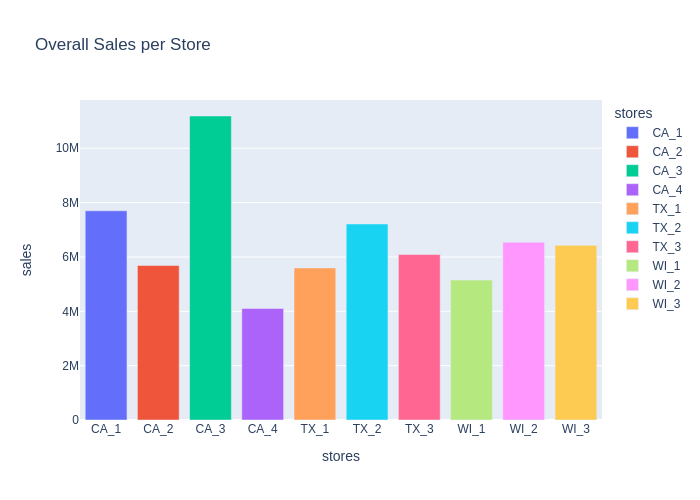

In [32]:
d_cols = [i for i in sales.columns if 'd_' in i]
sales_df = sales.groupby(['store_id'])[d_cols].sum()
store_sales = sales_df.sum(axis=1)
bar_plot = pd.DataFrame({'stores':store_sales.index, 'sales':store_sales.values})
fig = px.bar(bar_plot, x='stores', y='sales', color ='stores', title = 'Overall Sales per Store')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

In [33]:
# Observations:
#The CA_3 store have the highest sales whereas CA_4 have the lowest.
#Stores in Texas(TX) and Wisconsin(WI) have similar as sales among their corresponding state stores

In [34]:
#Sales of Stores in CA State

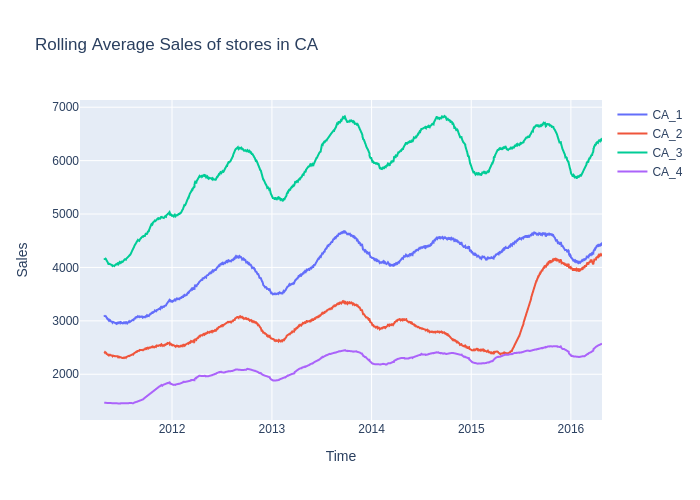

In [35]:
dates = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2011-01-29', end = '2016-04-24')]
past_sales = sales.set_index('id')[d_cols].T
cols = ['CA_1', 'CA_2', 'CA_3', 'CA_4']

fig = go.Figure()
for s in cols:
  store_items = [c for c in past_sales.columns if s in c]
  data = past_sales[store_items].sum(axis=1).rolling(90).mean()
  fig.add_trace(go.Scatter(x=dates, y=data, name=s))

fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales of stores in CA")
img_bytes = fig.to_image(format="png")
Image(img_bytes)

In [36]:
#Observations
#In California(CA)the store CA_1 has the highest sales and CA_4 has the lowest.
#There is almost similar trend observed in all stores of california, except CA_2 stores.
#From mid of 2014 the sales of CA_2 has started decline and met withe CA_4 in mid 2015 and then had sudden increase and followed CA_1 trend.

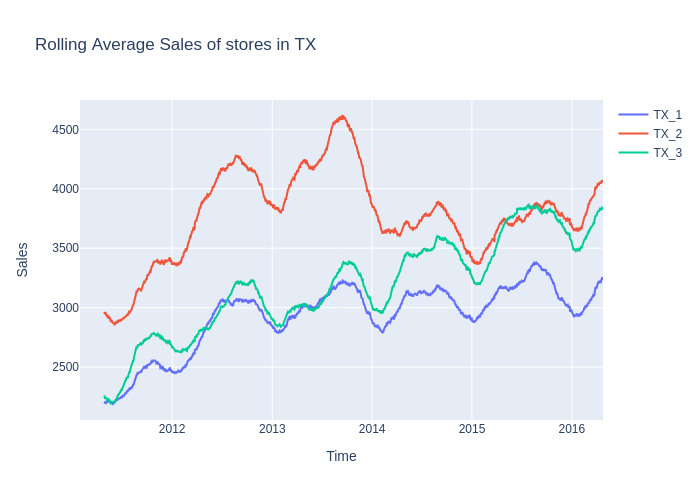

In [37]:
#Sales of stores in TX
cols = ['TX_1','TX_2','TX_3']

fig = go.Figure()
for s in cols:
    store_items = [c for c in past_sales.columns if s in c]
    data = past_sales[store_items].sum(axis=1).rolling(90).mean()
    fig.add_trace(go.Scatter(x=dates, y=data, name=s))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales of stores in TX")
img_bytes = fig.to_image(format="png")
Image(img_bytes)

In [38]:
#Observations:
#In Texas the TX_2 have highest sales and TX_1 have lowest.
#The sales of TX_1 and TX_2 follows similar trend while the sales of TX_3 often intersects with TX_1 for the starting years(2011-13) and 
#with TX_2 for ending years(2015-16).

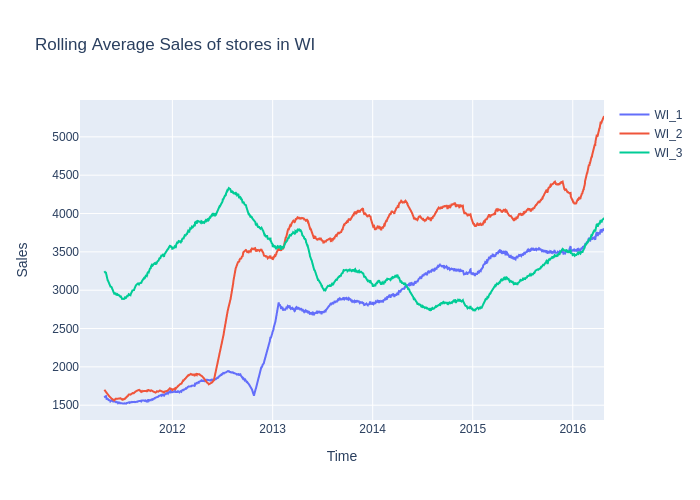

In [39]:
#Sales of stores in WI
cols = ['WI_1', 'WI_2', 'WI_3']

fig = go.Figure()
for s in cols:
  store_items = [c for c in past_sales.columns if s in c]
  data = past_sales[store_items].sum(axis=1).rolling(90).mean()
  fig.add_trace(go.Scatter(x=dates, y=data, name=s))

fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales of stores in WI")
img_bytes = fig.to_image(format="png")
Image(img_bytes)

In [40]:
# Observations
# No similar trend observed among the sales of stores of Wisconsin(WI).
# Store WI_3 had the highest sales for the starting years(2011-13) but decline un mid years(2013-14), started increasing in 2015.
# Store WI_1 and WI_2 have almost similar sales at beginning. The sales of WI_2 suddenly increased in mid of 2012 and followed an 
# increasing trend, whereas WI_1 suddenly increased(not up to sales of WI_2) in end of 2012 and also followed as increasing trend further.

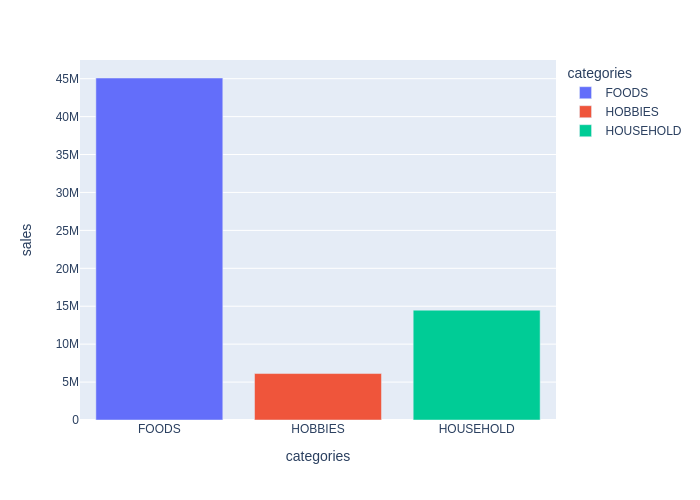

In [41]:
# Overall Sales Category wise

sales_df = sales.groupby(['cat_id'])[d_cols].sum()
cat_sales = sales_df.sum(axis=1)
bar_plot = pd.DataFrame({'categories':cat_sales.index, 'sales':cat_sales.values})
fig = px.bar(bar_plot, x='categories', y='sales', color='categories')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

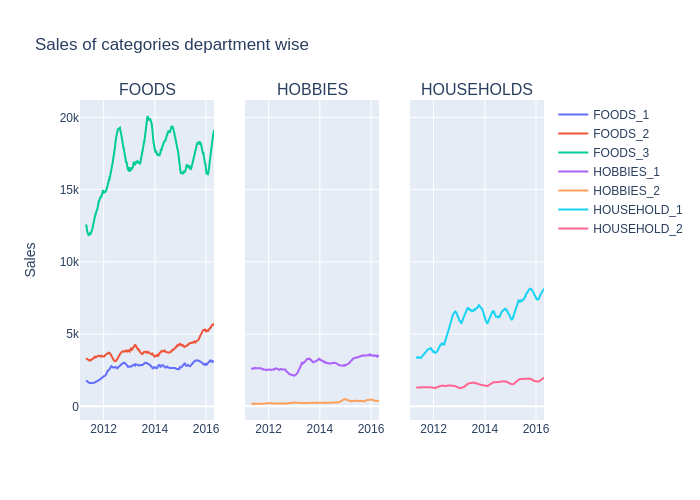

In [42]:
#Sales per categories
fig = make_subplots(rows = 1,cols = 3,subplot_titles=('FOODS', 'HOBBIES', 'HOUSEHOLDS'),shared_yaxes = True)

depts = [['FOODS_1','FOODS_2','FOODS_3'],['HOBBIES_1','HOBBIES_2'],['HOUSEHOLD_1','HOUSEHOLD_2']]

dates = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2011-01-29', end = '2016-04-24')]

past_sales = sales.set_index('id')[d_cols].T

for i in range(len(depts)):
    cols = depts[i]
    for s in cols:
        store_items = [c for c in past_sales.columns if s in c]
        data = past_sales[store_items].sum(axis=1).rolling(90).mean()
        fig.add_trace(go.Scatter(x=dates, y=data, name=s),row = 1,col = i+1)
    
fig.update_layout(yaxis_title="Sales", title = 'Sales of categories department wise')
img_bytes = fig.to_image(format="png")
Image(img_bytes)

In [43]:
#Observations:
#FOODS is the most sold category followed by HOUSEHOLD and HOBBIES. It is obvious that people will need essential items the most than other things.
#FOODS_3 is driving the sales of FOOD Category, while FOODS_2 is little picking up at the end.
#HOUSEHOLD_1 tends to follow an increasing trend while the other three(HOBBIES_1, HOBBIES_2, HOUSEHOLD_2)seems to be settled at the same
#range of sales.

In [44]:
#EDA on Calendar data

In [45]:
cal.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [46]:
cal.dtypes

date            datetime64[ns]
wm_yr_wk                 int16
weekday               category
wday                      int8
month                     int8
year                     int16
d                     category
event_name_1          category
event_type_1          category
event_name_2          category
event_type_2          category
snap_CA                   int8
snap_TX                   int8
snap_WI                   int8
dtype: object

In [47]:
cal1 = cal.event_name_1.cat.add_categories("No_Event")

In [48]:
cal1 = cal1.fillna("No_Event")

In [49]:
cal1.head()

0    No_Event
1    No_Event
2    No_Event
3    No_Event
4    No_Event
Name: event_name_1, dtype: category
Categories (31, object): ['Chanukah End', 'Christmas', 'Cinco De Mayo', 'ColumbusDay', ...,
                          'Thanksgiving', 'ValentinesDay', 'VeteransDay', 'No_Event']

In [50]:
print('Total Events in a year', len(cal['event_name_1'].unique())-1)
print('Different types of Events:', len(cal['event_type_1'].unique())-1, "they are", cal['event_type_1'].unique()[1:])

Total Events in a year 30
Different types of Events: 4 they are ['Sporting', 'Cultural', 'National', 'Religious']
Categories (4, object): ['Cultural', 'National', 'Religious', 'Sporting']


In [51]:
d_events = len(cal)-len(cal[cal['event_type_1'] == 'No_Event'])
print("Days with events:",d_events)
print(round((d_events/len(cal))*100,2),"% of days had events")

Days with events: 1969
100.0 % of days had events


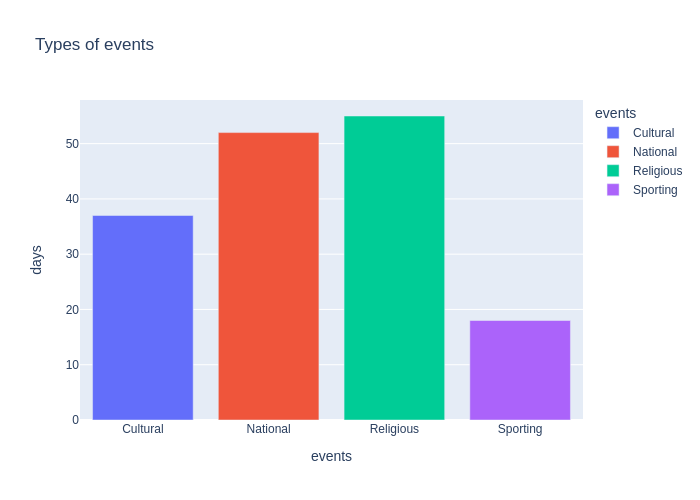

In [52]:
bar_plot = cal.groupby(['event_type_1']).agg(['count'])
bar_df = pd.DataFrame({'events':bar_plot.index, 'days' : bar_plot[('date','count')]})
#bar_df = bar_df.drop(['No_Event'])
fig = px.bar(bar_df, x='events', y='days', color = 'events', title = 'Types of events')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

In [53]:
#Plotting the snap days for each state for year 2012

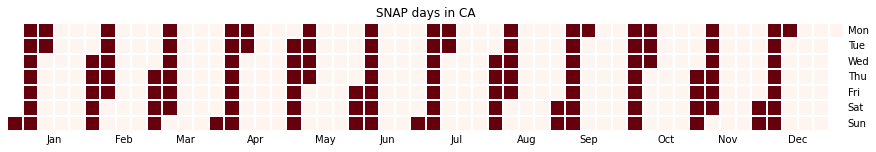

In [54]:
days = pd.date_range('1/29/2011', periods=1969, freq='D')

event1 = pd.Series(cal['snap_CA'].values,index = days)
event2 = pd.Series(cal['snap_TX'].values,index = days)
event3 = pd.Series(cal['snap_WI'].values,index = days)

f, ax = plt.subplots(1, 1, figsize = (15, 10))
calmap.yearplot(event1, dayticks = True,year=2012,ax = ax)
plt.title("SNAP days in CA")

plt.show()

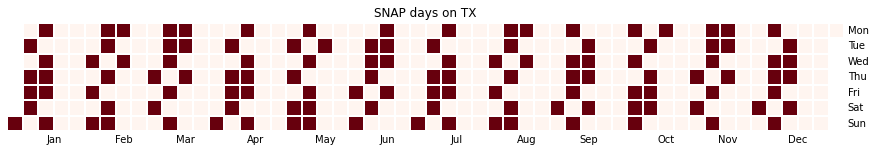

In [55]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
calmap.yearplot(event2, dayticks = True,year=2012,ax = ax)
plt.title("SNAP days on TX")
plt.show()

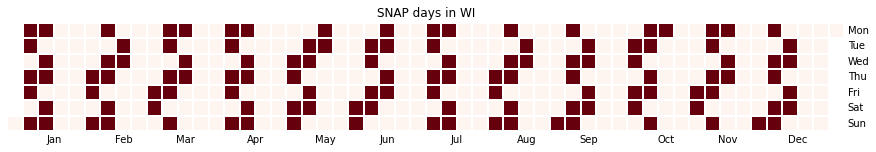

In [56]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
calmap.yearplot(event3, dayticks = True,year=2012,ax = ax)
plt.title("SNAP days in WI")
plt.show()

In [57]:
# Observations:
# * Out of total days covered in data, 8% of the days have a special event. Of these events Religious and National events are the most events
# * Almost 30% of the days had the sales of items with SNAP food stamps. In CA state the first 10 days of months are SNAP days. In TX state the SNAP
# days follows the code 101011 and in WI SNAP days follows 011 code. All the SNAO days are in the first 15 days of the months. 
# Thus making it the 30%

In [58]:
cal = pd.read_csv('calendar.csv')
cal = cal.fillna('No_Event')

In [59]:
# Sales on Events vs Non_events

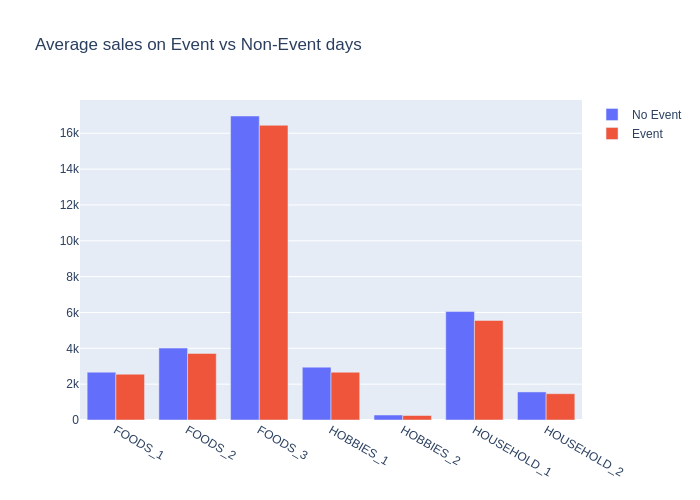

In [60]:
cal = cal.iloc[:1913]
d_no_event = list(cal[cal['event_type_1'] == 'No_Event']['d'])
d_event = list(cal[cal['event_type_1'] != 'No_Event']['d'])

sales_df = sales.groupby(['dept_id']).sum()

no_mean = []
eve_mean = []

depts = ['FOODS_1','FOODS_2', 'FOODS_3', 'HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2']

for i in range(len(depts)):
    no_mean.append(sales_df[d_no_event].iloc[i].mean())
    eve_mean.append(sales_df[d_event].iloc[i].mean())

fig = go.Figure(data=[
    go.Bar(name='No Event', x=depts, y = no_mean),
    go.Bar(name='Event', x=depts, y = eve_mean)
])

fig.update_layout(barmode='group',title = 'Average sales on Event vs Non-Event days')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

In [61]:
# Observation:
# *Average sale on Non-Event day is slightly greater to average sale on event day for all categories

In [62]:
# Sales on Snap vs Non_snap days

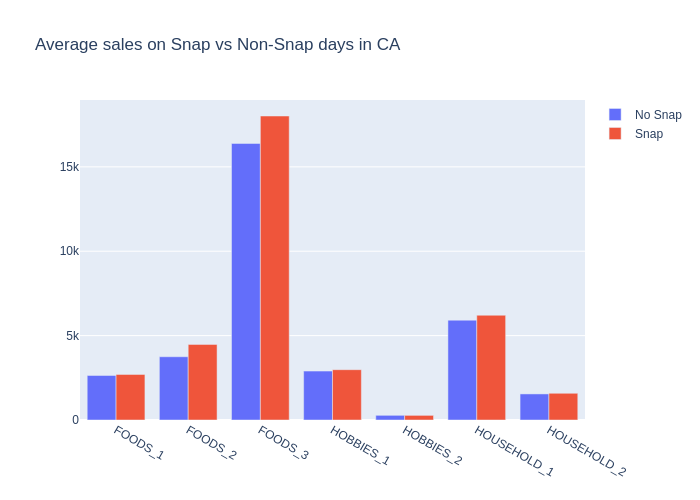

In [63]:
#For CA

d_no_snap = list(cal[cal['snap_CA'] == 0]['d'])
d_snap = list(cal[cal['snap_CA'] == 1]['d'])

no_mean = []
s_mean = []

for i in range(len(depts)):
    no_mean.append(sales_df[d_no_snap].iloc[i].mean())
    s_mean.append(sales_df[d_snap].iloc[i].mean())

fig = go.Figure(data=[
    go.Bar(name='No Snap', x=depts, y = no_mean),
    go.Bar(name='Snap', x=depts, y = s_mean)
])

fig.update_layout(barmode='group',title = 'Average sales on Snap vs Non-Snap days in CA')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

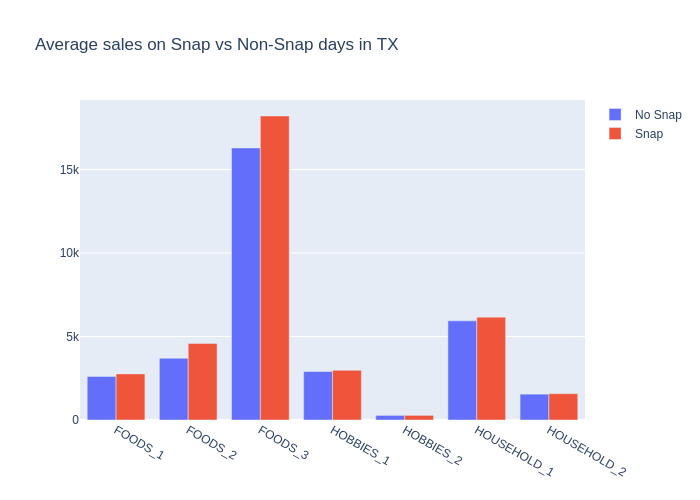

In [64]:
#For TX

d_no_snap = list(cal[cal['snap_TX'] == 0]['d'])
d_snap = list(cal[cal['snap_TX'] == 1]['d'])

no_mean = []
s_mean = []

for i in range(len(depts)):
    no_mean.append(sales_df[d_no_snap].iloc[i].mean())
    s_mean.append(sales_df[d_snap].iloc[i].mean())

fig = go.Figure(data=[
    go.Bar(name='No Snap', x=depts, y = no_mean),
    go.Bar(name='Snap', x=depts, y = s_mean)
])

fig.update_layout(barmode='group',title = 'Average sales on Snap vs Non-Snap days in TX')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

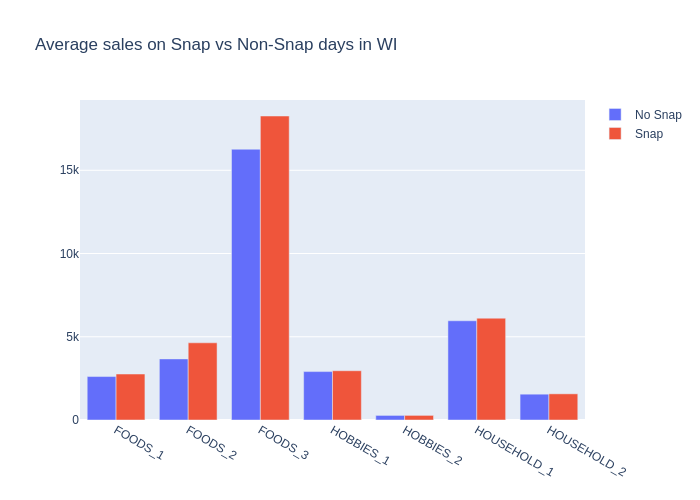

In [65]:
#For WI

d_no_snap = list(cal[cal['snap_WI'] == 0]['d'])
d_snap = list(cal[cal['snap_WI'] == 1]['d'])

no_mean = []
s_mean = []

for i in range(len(depts)):
    no_mean.append(sales_df[d_no_snap].iloc[i].mean())
    s_mean.append(sales_df[d_snap].iloc[i].mean())

fig = go.Figure(data=[
    go.Bar(name='No Snap', x=depts, y = no_mean),
    go.Bar(name='Snap', x=depts, y = s_mean)
])

fig.update_layout(barmode='group',title = 'Average sales on Snap vs Non-Snap days in WI')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

In [66]:
#Observations:
#* In all states the plot is same
# * On snap days as the item prices are low the average sales are slightly high than normal sales
# * Among all the category FOODS_3 category have large difference between sales on snap and normal days

In [67]:
#Weekly seasonality
#calculating overall sales of each state and aggregating the sales on each day of the week.

In [68]:
#days = list(cal['wday'].iloc[:1913])
#sales_df = sales.groupby(['state_id']).sum()

#weekly_agg = pd.DataFrame({'weeks': days, 'CA' : sales_df.iloc[0], 'TX' : sales_df.iloc[0], 'WI' : sales_df.iloc[0]})
#weekly_agg = weekly_agg.groupby(['weeks']).mean()
#weekly_agg.head()

#fig = go.Figure()
#fig.add_trace(go.Scatter(x=days, y= weekly_agg['CA'],
#                    mode='lines',
#                    name='CA'))
#fig.add_trace(go.Scatter(x=days, y=weekly_agg['TX'],
#                    mode='lines',
#                    name='TX'))
#fig.add_trace(go.Scatter(x=days, y=weekly_agg['WI'],
#                    mode='lines', name='WI'))

#fig.update_layout(title='Weekly Trend',
#                   xaxis_title='Time',
#                   yaxis_title='Sales')
#fig.show()
#img_bytes = fig.to_image(format="png")
#Image(img_bytes)

In [69]:
#Observation
#*Similar trend in three state with highest sales on weekends

In [70]:
# Monthly Seasonality
# Calculating overall sales of each state and aggregating the sales on each month of the year.

In [71]:
#month_no = list(cal['month'].iloc[:1913])

#monthly_agg = pd.DataFrame({'months': month_no, 'CA' : sales_df.iloc[0], 'TX' : sales_df.iloc[1], 'WI' : sales_df.iloc[2]})
#monthly_agg = monthly_agg.groupby(['months']).mean()

#months = ['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']

#fig = go.Figure()
#fig.add_trace(go.Scatter(x=months, y= monthly_agg['CA'],
#                    mode='lines',
#                    name='CA'))
#fig.add_trace(go.Scatter(x=months, y=monthly_agg['TX'],
#                    mode='lines',
#                    name='TX'))
#fig.add_trace(go.Scatter(x=months, y=monthly_agg['WI'],
#                    mode='lines', name='WI'))

#fig.update_layout(title='Monthly Trend',
#                   xaxis_title='Time',
#                   yaxis_title='Sales')
#fig.show()
#img_bytes = fig.to_image(format="png")
#Image(img_bytes)

In [72]:
#Observations:
#*Highest sales in observed in March with slightly dips in month Nov and May.

In [73]:
# Weekly Seasonality by category and state

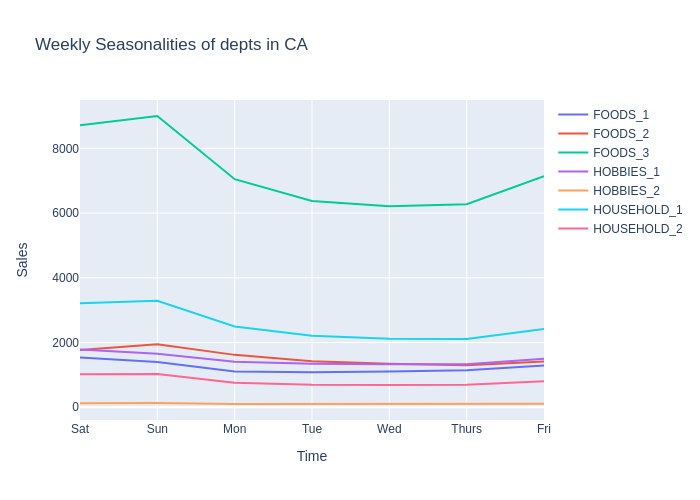

In [74]:
#For CA
days = list(cal['wday'].iloc[:1913])
sales_df = sales[sales['state_id'] == 'CA'].groupby(['dept_id']).sum()

w_seas = pd.DataFrame({'days': days, 'FOODS_1' : sales_df.iloc[0], 'FOODS_2' : sales_df.iloc[1], 'FOODS_3' : sales_df.iloc[2],
                           'HOBBIES_1' : sales_df.iloc[3], 'HOBBIES_2' : sales_df.iloc[4], 'HOUSEHOLD_1' : sales_df.iloc[5],
                           'HOUSEHOLD_2' : sales_df.iloc[6] })
w_seas = w_seas.groupby(['days']).mean()
w_seas['days'] =  ['Sat','Sun','Mon','Tue','Wed','Thurs','Fri']

depts = ['FOODS_1','FOODS_2','FOODS_3','HOBBIES_1','HOBBIES_2','HOUSEHOLD_1','HOUSEHOLD_2']

fig = go.Figure()
for i in depts:
    fig.add_trace(go.Scatter(x= w_seas['days'], y= w_seas[i],
                    mode='lines',
                    name=i))

fig.update_layout(title='Weekly Seasonalities of depts in CA',
                   xaxis_title='Time',
                   yaxis_title='Sales')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

In [75]:
#sales_df = sales[sales['state_id'] == 'TX'].groupby(['dept_id']).sum()

#w_seas = pd.DataFrame({'days': days, 'FOODS_1' : sales_df.iloc[0], 'FOODS_2' : sales_df.iloc[1], 'FOODS_3' : sales_df.iloc[2],
#                           'HOBBIES_1' : sales_df.iloc[3], 'HOBBIES_2' : sales_df.iloc[4], 'HOUSEHOLD_1' : sales_df.iloc[5],
#                           'HOUSEHOLD_2' : sales_df.iloc[6] })
#w_seas = w_seas.groupby(['days']).mean()
#w_seas['days'] =  ['Sat','Sun','Mon','Tue','Wed','Thurs','Fri']

#depts = ['FOODS_1','FOODS_2','FOODS_3','HOBBIES_1','HOBBIES_2','HOUSEHOLD_1','HOUSEHOLD_2']

#fig = go.Figure()
#for i in depts:
#    fig.add_trace(go.Scatter(x= w_seas['days'], y= w_seas[i],
#                    mode='lines',
#                    name=i))

#fig.update_layout(title='Weekly Seasonalities of depts in TX',
#                   xaxis_title='Time',
#                   yaxis_title='Sales')
#fig.show()
#img_bytes = fig.to_image(format="png")
#Image(img_bytes)

In [76]:
#sales_df = sales[sales['state_id'] == 'WI'].groupby(['dept_id']).sum()

#w_seas = pd.DataFrame({'days': days, 'FOODS_1' : sales_df.iloc[0], 'FOODS_2' : sales_df.iloc[1], 'FOODS_3' : sales_df.iloc[2],
#                           'HOBBIES_1' : sales_df.iloc[3], 'HOBBIES_2' : sales_df.iloc[4], 'HOUSEHOLD_1' : sales_df.iloc[5],
#                           'HOUSEHOLD_2' : sales_df.iloc[6] })
#w_seas = w_seas.groupby(['days']).mean()
#w_seas['days'] =  ['Sat','Sun','Mon','Tue','Wed','Thurs','Fri']

#depts = ['FOODS_1','FOODS_2','FOODS_3','HOBBIES_1','HOBBIES_2','HOUSEHOLD_1','HOUSEHOLD_2']

#fig = go.Figure()
#for i in depts:
#    fig.add_trace(go.Scatter(x= w_seas['days'], y= w_seas[i],
#                    mode='lines',
#                    name=i))

#fig.update_layout(title='Weekly Seasonalities of depts in WI',
#                   xaxis_title='Time',
#                   yaxis_title='Sales')
#fig.show()
#img_bytes = fig.to_image(format="png")
#Image(img_bytes)

In [77]:
# Monthly Seasonality by category and state

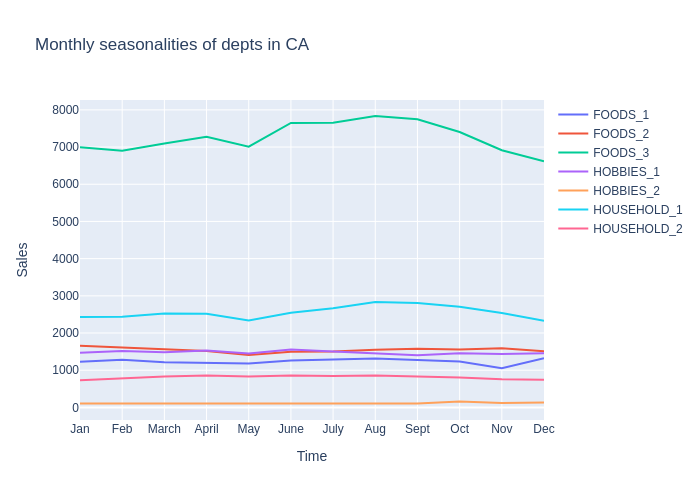

In [78]:
months = ['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
month_no = list(cal['month'].iloc[:1913])

sales_df = sales[sales['state_id'] == 'CA'].groupby(['dept_id']).sum()

m_seas = pd.DataFrame({'months': month_no, 'FOODS_1' : sales_df.iloc[0], 'FOODS_2' : sales_df.iloc[1], 'FOODS_3' : sales_df.iloc[2],
                           'HOBBIES_1' : sales_df.iloc[3], 'HOBBIES_2' : sales_df.iloc[4], 'HOUSEHOLD_1' : sales_df.iloc[5],
                           'HOUSEHOLD_2' : sales_df.iloc[6] })
m_seas = m_seas.groupby(['months']).mean()

depts = ['FOODS_1','FOODS_2','FOODS_3','HOBBIES_1','HOBBIES_2','HOUSEHOLD_1','HOUSEHOLD_2']

fig = go.Figure()
for i in depts:
    fig.add_trace(go.Scatter(x= months, y= m_seas[i],
                    mode='lines',
                    name=i))

fig.update_layout(title='Monthly seasonalities of depts in CA',
                   xaxis_title='Time',
                   yaxis_title='Sales')
#fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

In [79]:
#sales_df = sales[sales['state_id'] == 'TX'].groupby(['dept_id']).sum()

#m_seas = pd.DataFrame({'months': month_no, 'FOODS_1' : sales_df.iloc[0], 'FOODS_2' : sales_df.iloc[1], 'FOODS_3' : sales_df.iloc[2],
#                           'HOBBIES_1' : sales_df.iloc[3], 'HOBBIES_2' : sales_df.iloc[4], 'HOUSEHOLD_1' : sales_df.iloc[5],
#                           'HOUSEHOLD_2' : sales_df.iloc[6] })
#m_seas = m_seas.groupby(['months']).mean()

#fig = go.Figure()
#for i in depts:
#    fig.add_trace(go.Scatter(x= months, y= m_seas[i],
#                    mode='lines',
#                    name=i))

#fig.update_layout(title='Monthly seasonalities of depts in TX',
#                   xaxis_title='Time',
#                   yaxis_title='Sales')
#fig.show()
#img_bytes = fig.to_image(format="png")
#Image(img_bytes)

In [80]:
#sales_df = sales[sales['state_id'] == 'WI'].groupby(['dept_id']).sum()

#m_seas = pd.DataFrame({'months': month_no, 'FOODS_1' : sales_df.iloc[0], 'FOODS_2' : sales_df.iloc[1], 'FOODS_3' : sales_df.iloc[2],
#                           'HOBBIES_1' : sales_df.iloc[3], 'HOBBIES_2' : sales_df.iloc[4], 'HOUSEHOLD_1' : sales_df.iloc[5],
#                           'HOUSEHOLD_2' : sales_df.iloc[6] })
#m_seas = m_seas.groupby(['months']).mean()

#fig = go.Figure()
#for i in depts:
#    fig.add_trace(go.Scatter(x= months, y= m_seas[i],
#                    mode='lines',
#                    name=i))

#fig.update_layout(title='Monthly seasonalities of depts in WI',
#                   xaxis_title='Time',
#                   yaxis_title='Sales')
#fig.show()
#img_bytes = fig.to_image(format="png")
#Image(img_bytes)

In [81]:
#Observations:
#*Weekly trends for all states and categories were almost same.
#*Sales ate weekends were most for all categories
#*In states for all categories the dips were at month May
#*In CA and TX the highest sales were observed in August.
#*In WI the sales weren't much deviating and were increasing in winter.

#There was not much changes in sales observed according to seasons and categories.

In [82]:
# Feature Engineering.(FE)

In [83]:
sales_eval = pd.read_csv('sales_train_evaluation.csv')  
sales_eval = reduce(sales_eval)  #downcasting
prices = pd.read_csv("sell_prices.csv")

#making test dataset, filling it with zero
for day in range(1942,1970):
    sales_eval['d_' + str(day)] = 0
    sales_eval['d_' + str(day)] = sales_eval['d_' + str(day)].astype(np.int16)

sales_eval.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1960,d_1961,d_1962,d_1963,d_1964,d_1965,d_1966,d_1967,d_1968,d_1969
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
# Melting the data from wide form to long form
# i.e. converting all sales at date columns to row, for each row getting sales at that date
#for better understanding compare the above dataframe and below dataframe

data = pd.melt(sales_eval, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],
          var_name='d', value_name='sales').dropna()
data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0


In [ ]:
data = pd.merge(data, cal, on='d', how='left')
data = pd.merge(data, prices, on=['item_id','store_id'], how='left')
data.head()

In [ ]:
data["sell_price"].fillna(data.groupby("id")["sell_price"].transform("mean"), inplace=True)
data['d'] = data['d'].apply(lambda a: a.split('_')[1]).astype(np.int16)
data.drop(columns=["date","weekday"], inplace=True)
data.head()

In [ ]:
import pandas as pd
data = pd.read_pickle('/content/submission.pkl')

In [ ]:
#label encoding
#https://www.kaggle.com/anshuls235/time-series-forecasting-eda-fe-modelling

cols = data.dtypes.index.tolist()
d_types = data.dtypes.values.tolist()

for i,type in enumerate(d_types):
    if type.name == 'category':
        data[cols[i]] = data[cols[i]].cat.codes

In [ ]:
#Intoducing lags and rolling features
#lag features

lags = [1,2,3,5,7,14,21,28]
for lag in lags:
    data["lag_" + str(lag)] = data.groupby("id")["sales"].shift(lag).astype(np.float16)

In [ ]:
#rolling mean features

data['rolling_mean_10'] = data.groupby('id')['sales'].transform(lambda x: x.rolling(10).mean())
data['rolling_mean_20'] = data.groupby('id')['sales'].transform(lambda x: x.rolling(20).mean())
data['rolling_mean_30'] = data.groupby('id')['sales'].transform(lambda x: x.rolling(30).mean())

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
#As data is very large to handle(4.2 GB), considering only the further 900 days data 

data = data[data['d']>1000]
data.head()

In [ ]:
data.info()

In [ ]:
data.to_pickle("data.pkl")

In [ ]:
# Conclusion:
# An upward trend in overall sales was observed.
# Among all three states California(CA) has more sales because it has more stores than other states and population is also more compared to others.
# Food category is most sold item as it is more essential than household and hobbies.
# Sales didn't varied much on event days but slightly increased on snap days, because of lower rates.
# Their were 4 types of events out of them Religious events occured most.
# CA_3 store of california has the highest sales among all the stores whereas the lowest sales was observed in CA_4. Maybe the location and 
# population is the reason for it. CA_3 maybe is in some urban area and CA_4 is in little remote area.
# People mostly like to shop on weekends, as most of the people have break on weekends.
# Mostly sales are on peak in the end of Summer(August)/start of Autumn, a sudden dip in may and stable in winter.
# A final dataset for modeling was prepared by merging all price and date data and introducing some features with previous sales data like lag and
# rolling mean.

Deep AR

In [ ]:
def windowed_dataset(x, window_size, batch_size, shuffle):
  ds = tf.data.Dataset.from_tensor_slices(x)
  ds = ds.window(window_size + 1, shift=1, stride=1, drop_remainder=True)
  ds = ds.flat_map(lambda w: w.batch(window_size + 1))
  if shuffle:
    ds = ds.shuffle(1000)
  ds = ds.map(lambda w: (w[:-1], w[-1]))
  return ds.batch(batch_size).prefetch(1)
  

In [ ]:
import os

import warnings
warnings.filterwarnings('ignore')

import pickle

import numpy as np
import pandas as pd
from typing import Dict, Callable, List, Optional, Tuple, Union

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

import torch

import pytorch_lightning as pl

In [ ]:
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
from pytorch_forecasting import Baseline, DeepAR, TimeSeriesDataSet

In [ ]:
from pytorch_forecasting.data import NaNLabelEncoder
from pytorch_forecasting.metrics import SMAPE, DistributionLoss, distributions, BaseEstimator

In [ ]:
class MultivariateDistributionLoss(DistributionLoss):
    """Base class for multivariate distribution losses.
    Class should be inherited for all multivariate distribution losses, i.e. if a batch of values
    is predicted in one go and the batch dimension is not independent, but the time dimension still
    remains independent.
    """

    def sample(self, y_pred, n_samples: int) -> torch.Tensor:
        """
        Sample from distribution.
        Args:
            y_pred: prediction output of network (shape batch_size x n_timesteps x n_paramters)
            n_samples (int): number of samples to draw
        Returns:
            torch.Tensor: tensor with samples  (shape batch_size x n_timesteps x n_samples)
        """
        dist = self.map_x_to_distribution(y_pred)
        samples = dist.sample((n_samples,)).permute(
            2, 1, 0
        )  # returned as (n_samples, n_timesteps, batch_size), so reshape to (batch_size, n_timesteps, n_samples)
        return samples

    def to_prediction(self, y_pred: torch.Tensor) -> torch.Tensor:
        """
        Convert network prediction into a point prediction.
        Args:
            y_pred: prediction output of network
        Returns:
            torch.Tensor: mean prediction
        """
        distribution = self.map_x_to_distribution(y_pred)

        return distribution.mean.transpose(0, 1)  # switch to batch_size x n_timesteps

    def loss(self, y_pred: torch.Tensor, y_actual: torch.Tensor) -> torch.Tensor:
        """
        Calculate negative likelihood
        Args:
            y_pred: network output
            y_actual: actual values
        Returns:
            torch.Tensor: metric value on which backpropagation can be applied
        """
        distribution = self.map_x_to_distribution(y_pred)
        # calculate one number and scale with batch size
        loss = -distribution.log_prob(y_actual.transpose(0, 1)).sum() * y_actual.size(0)
        return loss

In [ ]:
import torch.nn.functional as F
class MultivariateNormalDistributionLoss(MultivariateDistributionLoss):
    """
    Multivariate low-rank normal distribution loss.
    Use this loss to make out of a DeepAR model a DeepVAR network.
    Requirements for original target normalizer:
        * not normalized in log space (use :py:class:`~LogNormalDistributionLoss`)
        * not coerced to be positive
    """

    distribution_class = distributions.LowRankMultivariateNormal

    def __init__(
        self,
        name: str = None,
        quantiles: List[float] = [0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 0.98],
        reduction: str = "mean",
        rank: int = 10,
        sigma_init: float = 1.0,
        sigma_minimum: float = 1e-3,
    ):
        """
        Initialize metric
        Args:
            name (str): metric name. Defaults to class name.
            quantiles (List[float], optional): quantiles for probability range.
                Defaults to [0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 0.98].
            reduction (str, optional): Reduction, "none", "mean" or "sqrt-mean". Defaults to "mean".
            rank (int): rank of low-rank approximation for covariance matrix. Defaults to 10.
            sigma_init (float, optional): default value for diagonal covariance. Defaults to 1.0.
            sigma_minimum (float, optional): minimum value for diagonal covariance. Defaults to 1e-3.
        """
        super().__init__(name=name, quantiles=quantiles, reduction=reduction)
        self.rank = rank
        self.sigma_minimum = sigma_minimum
        self.sigma_init = sigma_init
        self.distribution_arguments = list(range(2 + rank))

        # determine bias
        self._diag_bias: float = self.inv_softplus(self.sigma_init**2) if self.sigma_init > 0.0 else 0.0

    def map_x_to_distribution(self, x: torch.Tensor) -> distributions.Normal:
        x = x.permute(1, 0, 2)
        return self.distribution_class(
            loc=x[..., 0],
            cov_factor=x[..., 2:],
            cov_diag=x[..., 1],
        )

    @staticmethod
    def validate_encoder(encoder: BaseEstimator):
        assert encoder.transformation not in [
            "log",
            "log1p",
        ], "Use MultivariateLogNormalDistributionLoss for log scaled data"  # todo: implement
        assert encoder.transformation not in [
            "softplus",
            "relu",
        ], "Cannot use NormalDistributionLoss for positive data"
        assert encoder.transformation not in ["logit"], "Cannot use bound transformation such as 'logit'"

    def rescale_parameters(
        self, parameters: torch.Tensor, target_scale: torch.Tensor, encoder: BaseEstimator
    ) -> torch.Tensor:
        self.validate_encoder(encoder)

        # scale
        loc = encoder(dict(prediction=parameters[..., 0], target_scale=target_scale)).unsqueeze(-1)
        scale = (
            F.softplus(parameters[..., 1].unsqueeze(-1) + self._diag_bias) + self.sigma_minimum**2
        ) * target_scale[..., 1, None, None] ** 2

        cov_factor = parameters[..., 2:] * target_scale[..., 1, None, None]
        return torch.concat([loc, scale, cov_factor], dim=-1)

    def inv_softplus(self, y):
        if y < 20.0:
            return np.log(np.exp(y) - 1.0)
        else:
            return y

### Data 생성


In [ ]:
with open('data.pickle', 'rb') as f:
  data = pickle.load(f)


In [ ]:
data.keys()

In [ ]:
data['KRW-BTT'].head(3)

In [ ]:
[x for (x, y) in data.items() if len(y) == 720]

In [ ]:
d1 = data['KRW-ZIL']

In [ ]:
d1 = d1.sort_values('candle_date_time_kst')

In [ ]:
d1['time_index'] = np.arange(len(d1))

In [ ]:
date_index = d1[['time_index', 'candle_date_time_kst']]

In [ ]:
date_index.head()

In [ ]:
res_data = pd.DataFrame()
scalers = {}

for i, key in enumerate(data.keys()):
  tmp = data[key]
  tmp_1 = pd.merge(tmp, date_index, on = 'candle_date_time_kst')
  tmp_df_1 = tmp_1[['time_index', 'candle_date_time_kst', 'market']]

  # Scaling
  scaler = MinMaxScaler()
  scale_col = ['candle_acc_trade_volume', 'trade_price']
  scaled = scaler.fit_transform(tmp[scale_col])
  tmp_df_2 = pd.DataFrame(scaled, columns = ['candle_acc_trade_volume', 'trade_price'])
  tmp_res = pd.concat([tmp_df_1, tmp_df_2], axis = 1)

  res_data = pd.concat([res_data, tmp_res])
  scalers[key] = scaler

In [ ]:
res_data.shape

In [ ]:
res_data[res_data['time_index'].isna()]

In [ ]:
res_data.dropna(inplace = True)

In [ ]:
res_data['time_index'] = res_data['time_index'].astype(int)

In [ ]:
res_data.shape

In [ ]:
max_encoder_length = 60
max_prediction_length = 20
training_cutoff = res_data['time_index'].max() - max_prediction_length

In [ ]:
training_cutoff

In [ ]:
training = TimeSeriesDataSet(
  res_data[lambda x: x.time_index <= training_cutoff],
  time_idx = 'time_index',
  target = 'trade_price',
  categorical_encoders = {'market': NaNLabelEncoder().fit(res_data.market)},
  group_ids = ['market'],
  time_varying_unknown_reals = ['trade_price'],
  # time_varying_known_reals = ['candle_acc_trade_volume'],
  max_encoder_length = max_encoder_length,
  max_prediction_length = max_prediction_length,
  allow_missing_timesteps = True
)

In [ ]:
validation = TimeSeriesDataSet.from_dataset(
    training,
    res_data,
    min_prediction_idx = training_cutoff + 1
)

In [ ]:
batch_size = 128
train_dataloader = training.to_dataloader(train = True, batch_size = batch_size, num_workers = 0)
val_dataloader = validation.to_dataloader(train = False, batch_size = batch_size, num_workers = 0)

### Calculate baseline errror

In [ ]:
actuals = torch.cat([y[0] for x, y in iter(val_dataloader)])

In [ ]:
baseline_predictions = Baseline().predict(val_dataloader)
SMAPE()(baseline_predictions, actuals)

In [ ]:
pl.seed_everything(42)
trainer = pl.Trainer(gpus = 1, gradient_clip_val = .1)
net = DeepAR.from_dataset(
    training, 
    learning_rate = 3e-2, 
    hidden_size = 200, 
    rnn_layers = 2, 
   loss = MultivariateNormalDistributionLoss()
)

In [ ]:
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=10, verbose=True, mode="min")
lr_logger = LearningRateMonitor()

In [ ]:
trainer = pl.Trainer(
    max_epochs = 10,
    gpus = 1,
    weights_summary = 'top', ##
    gradient_clip_val = .01,
    callbacks = [lr_logger, early_stop_callback],
    limit_train_batches = 30,
    enable_checkpointing = True,
    # auto_lr_find = True
)

In [ ]:
trainer.fit(
    net,
    train_dataloaders = train_dataloader,
    val_dataloaders = val_dataloader,
)

In [ ]:
best_model_path

In [ ]:
best_model_path = trainer.checkpoint_callback.best_model_path
best_model = net.load_from_checkpoint(best_model_path)

In [ ]:
actuals = torch.cat([y[0] for x, y in iter(val_dataloader)])
predictions = net.predict(val_dataloader)
(actuals - predictions).abs().mean()

In [ ]:
val_dataloader = validation.to_dataloader(
    train=False, batch_size=batch_size, num_workers=0
)

In [ ]:
raw_predictions, x = net.predict(val_dataloader, mode = 'raw', return_x=True, n_samples=100)

In [ ]:
# for idx in range(2):  # plot 10 examples
for i in range(10):
    net.plot_prediction(x, raw_predictions, idx=i, add_loss_to_title=True)

In [ ]:
raw_predictions, x = net.predict(val_dataloader, return_x=True, n_samples=100)
for i in np.arange(60, 70):
    plt.figure(figsize=(4, 3))
    plt.plot(raw_predictions[i], label='prediction')
    plt.plot(actuals[i], label='actual')
    plt.suptitle('Timeseries Prediction')
    plt.legend()
    plt.show()